## Sampling
- We can use sampling to increase or reduce the size of an image, with up-sampling and down-sampling, respectively.

In [11]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

#As signal to noise is deprecated, here is a function that does the same work
import numpy as np
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

## 1. Up Sampling

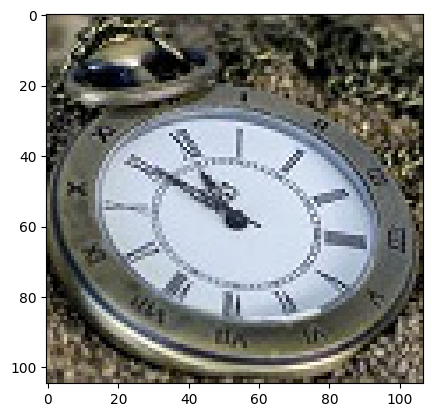

In [3]:
#Original image
im = Image.open("clock.jpg")
pylab.imshow(im)

#### Up sampling using nearest neighbor method
- done by taking the mean value of its nearest known one or more pixel-neighbors value

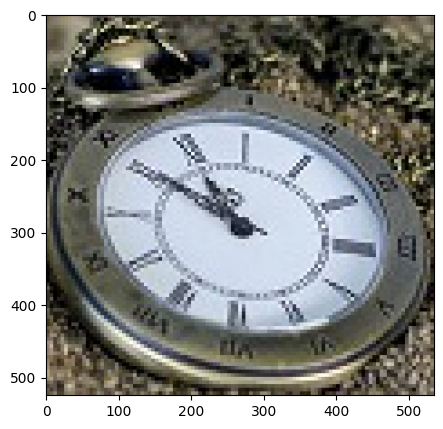

In [4]:
#Up sampling Using Nearest neighbor method
up_image = im.resize((im.width*5,im.height*5),Image.NEAREST)
pylab.figure(figsize=(5,5))
pylab.imshow(up_image)

As we can see, the output image, created with the nearest-neighbor method, is 25 times
larger than the input image, using the PIL library's resize() function. But clearly the
output image is pixelated (with the blocking artifacts and jagged edges) and is of poor
quality.

#### 1. Up sampling using bilinear interpolation method
- To interpolate the pixel value at any point P on the grid, the 2D analogue of linear interpolation: bilinear interpolation can be used <br><br>
- Let's consider a grayscale image, which is basically a 2D matrix of pixel values at integer grid location 
- In this case, for each possible point P (that we would like to interpolate), four neighbors (namely, Q11, Q12, Q22, and Q21) are going to be there and the intensity values of these four neighbors are to be combined to compute the interpolated intensity at the point P.

<img src="bilinearInterpolation.png" alt="Bilinear Interpolation" width="40%" height="40%">

- Notice how the quality improves when bi-linear interpolation is used with up-sampling

#### 2. Up Sampling using Bi-cubic interpolation
- The interpolated surface is smoother than corresponding surfaces obtained by bi-linear interpolation or nearest-neighbor interpolation

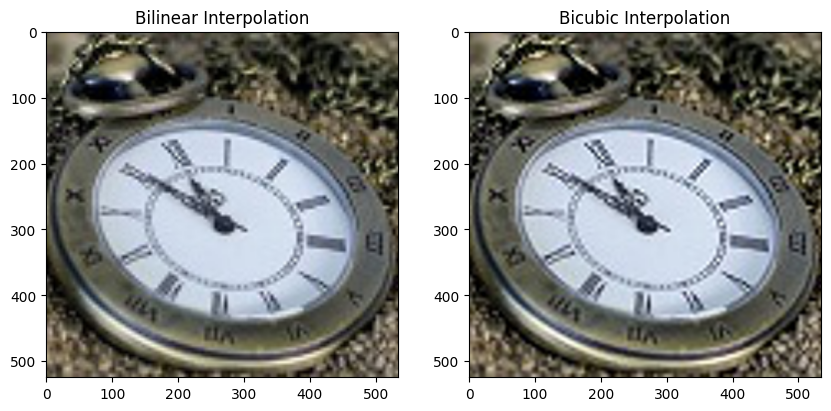

In [5]:
#Up sampling Using bilinear interpolation method
up_im2 = im.resize((im.width*5,im.height*5),Image.BILINEAR)
pylab.figure(figsize=(10,10))
pylab.subplot(1,2,1) 
pylab.title("Bilinear Interpolation")
pylab.imshow(up_im2)

#Up sampling Using bicubic interpolation method
up_img3 = im.resize((im.width*5,im.height*5),Image.BICUBIC)
pylab.subplot(1,2,2) 
pylab.title("Bicubic Interpolation")
pylab.imshow(up_img3)

## Down Sampling
- In order to decrease the size of an image, we need to down-sample the image. <br><br>
- For each pixel in the new smaller image, there will be multiple pixels in the original larger image. We can compute the value of a pixel in the new image by doing the following:

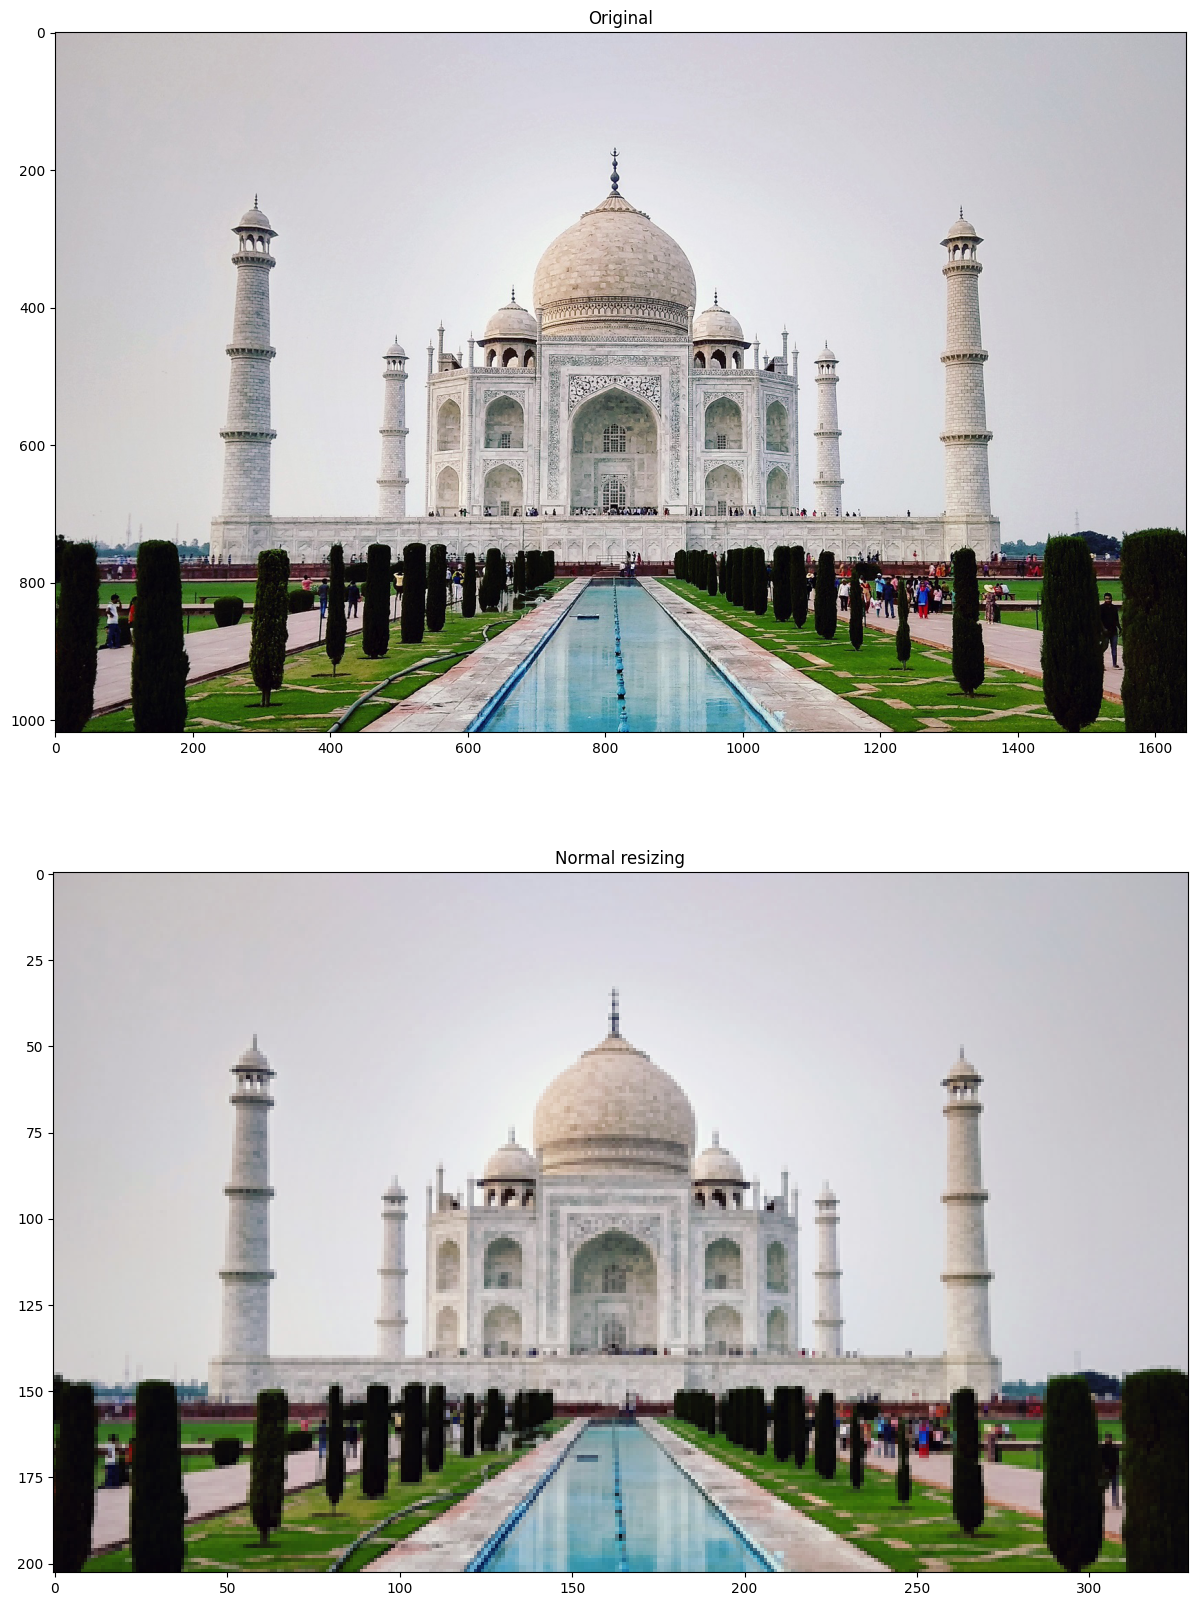

In [6]:
#Original Image
img = Image.open("tajmahal.jpg")
pylab.figure(figsize=(30,20))
pylab.subplot(2,1,1) 
pylab.title("Original")
pylab.imshow(img)

#Normal resizing
down_img1 = img.resize((img.width//5,img.height//5))
pylab.subplot(2,1,2) 
pylab.title("Normal resizing")
pylab.imshow(down_img1)

- As you can see, it contains some black patches/artifacts and patterns that were not present in the original image
- this effect is called <b>aliasing</b>. <br><br>
- Aliasing happens typically because the sampling rate is lower (we had too few pixels!) than the Nyquist rate
- so one way to avoid aliasing is to increase the sampling rate above the Nyquist rate

##### Solution: Down Sampling with Anti-Aliasing
- The problem here is that a single pixel in the output image corresponds to 25 pixels in the input image, but we are sampling the value of a single pixel instead. 
- We should be averaging over a small area in the input image
- For Anti-Aliasing we use `Image.LANCZOS` while PILLOW <br><br>
- Anti-aliasing is generally done by smoothing an image (via convolution of the image with a low-pass filter such as a Gaussian filter) before down-sampling

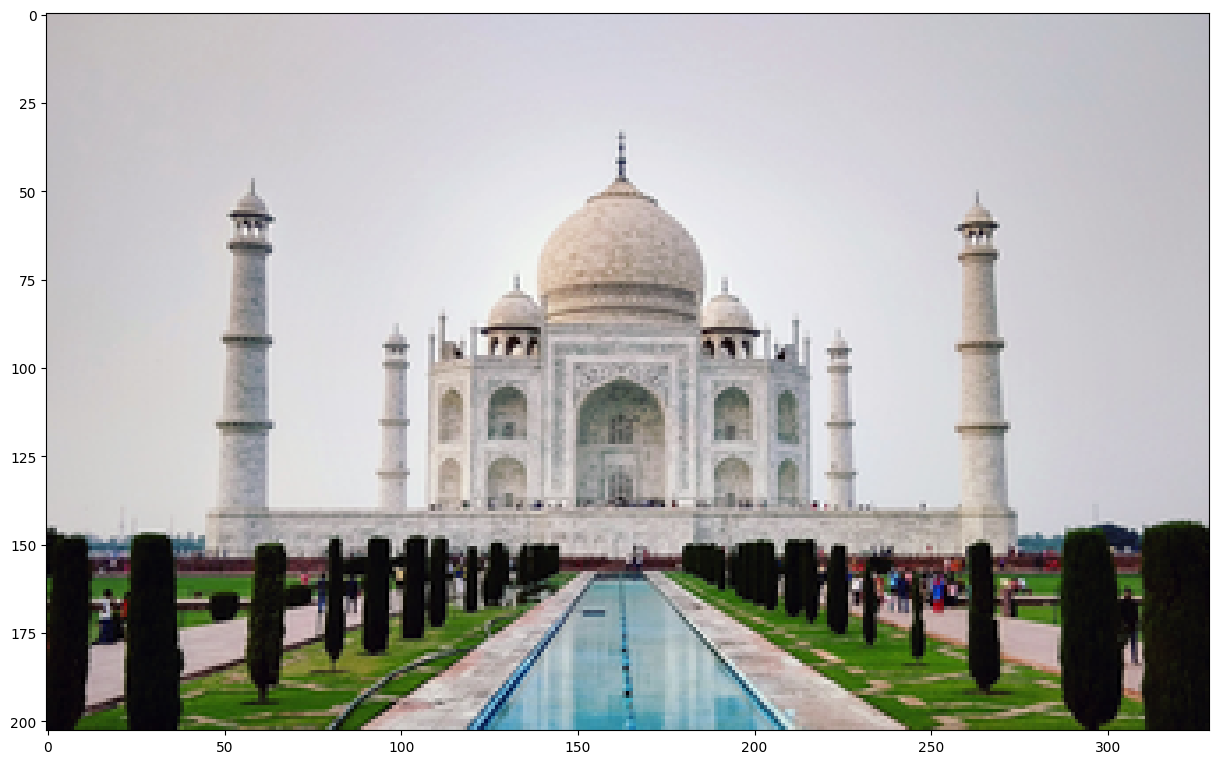

In [7]:
#Down sampling with Anti-Aliasing
down_img2 = img.resize((img.width//5,img.height//5),Image.LANCZOS)
pylab.figure(figsize=(15,10))
pylab.imshow(down_img2)

## Quantization
- Quantization is related to the intensity of an image and can be defined by the number of
bits used per pixel. Digital images typically are quantized to 256 gray levels.
- Here, we will see that, as the number of bits for pixel storage decreases, the quantization error increases, leading to artificial boundaries or contours and pixelating and resulting in the poor quality of an image

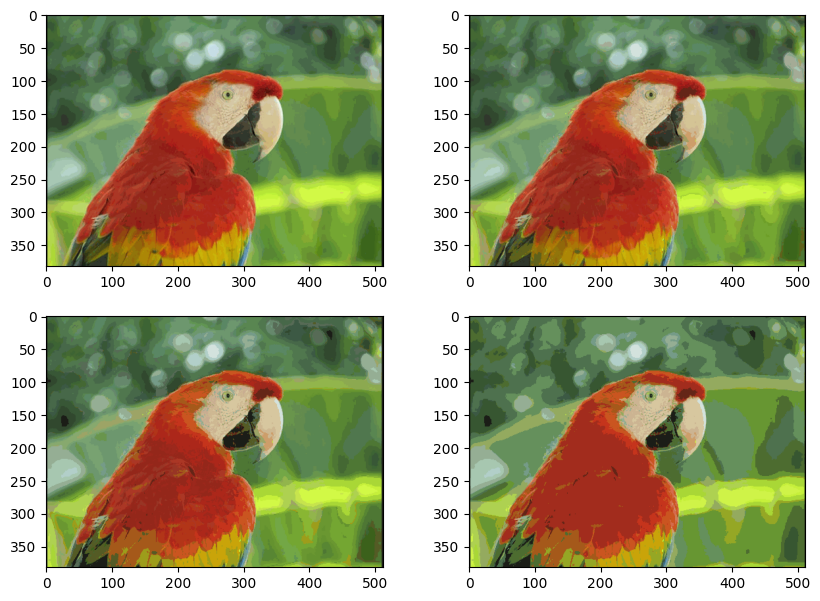

In [8]:
im = Image.open('parrot.png')
pylab.figure(figsize=(10,15))

#Dcresing the number of bits for each color
im1 = im.convert('P', palette=Image.ADAPTIVE, colors=256)
pylab.subplot(4,2,1)
pylab.imshow(im1)

im1 = im.convert('P', palette=Image.ADAPTIVE, colors=128)
pylab.subplot(4,2,2)
pylab.imshow(im1)

im1 = im.convert('P', palette=Image.ADAPTIVE, colors=64)
pylab.subplot(4,2,3)
pylab.imshow(im1)

im1 = im.convert('P', palette=Image.ADAPTIVE, colors=32)
pylab.subplot(4,2,4)
pylab.imshow(im1)



## Discrete Fourier Transform
- As far as image processing is concerned, we shall focus only on 2D Discrete Fourier Transform (DFT). 
- The basic idea behind the Fourier transform method is that an image can be thought of as a 2D function, f, that can be expressed as a weighted sum of sines and cosines (Fourier basic functions) along two dimensions <br><br>

Now, lets convert a image to frequency domain using `fft` and then again convert it back to original using reconstruction

SNR for the original image = 2.032390538354219
SNR for the image obtained after reconstruction = 2.032390538354219


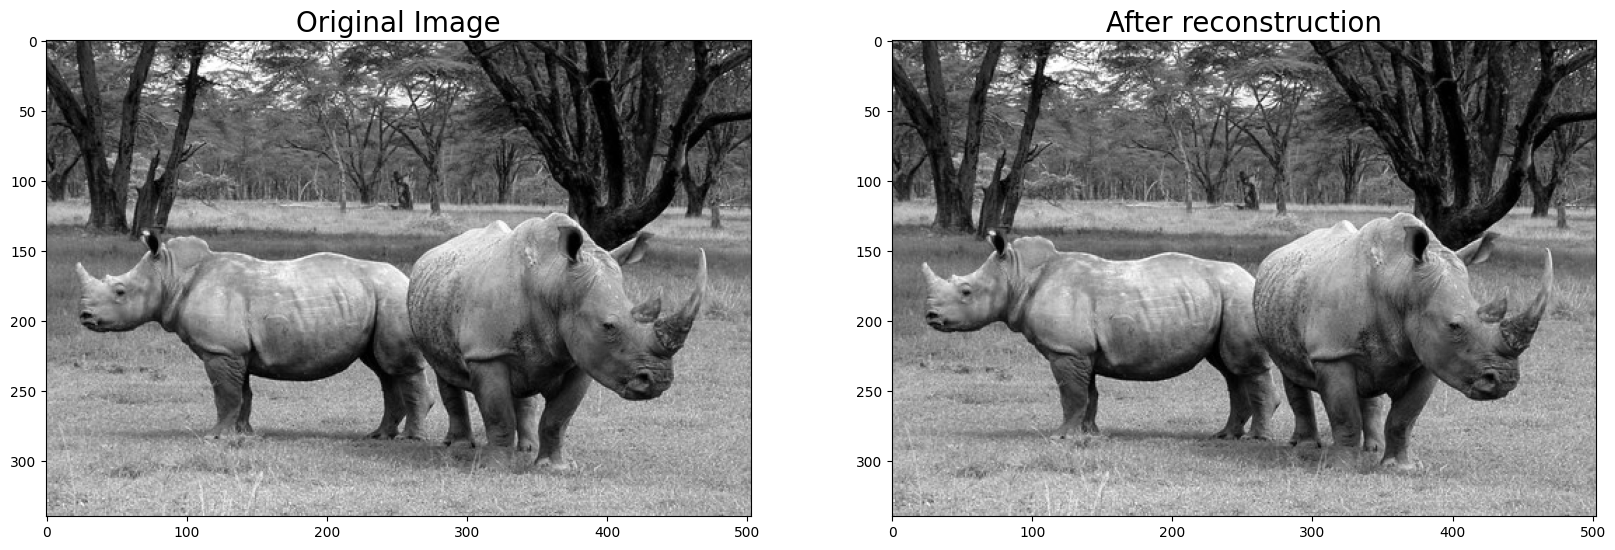

In [35]:
im = np.array(Image.open('rhino.jpg').convert('L')) #converting to grayscale image
snr = signaltonoise(im, axis=None)
print('SNR for the original image = ' + str(snr))

# now call FFT and IFFT
freq = fp.fft2(im)              #tranforming using FFT
im1 = fp.ifft2(freq).real       #reconstructing back to original

snr = signaltonoise(im1, axis=None)
print('SNR for the image obtained after reconstruction = ' + str(snr))

pylab.figure(figsize=(20,10))
pylab.subplot(121)
pylab.title('Original Image', size=20)
pylab.imshow(im, cmap='gray')
pylab.subplot(122)
pylab.title('After reconstruction', size=20)
pylab.imshow(im1, cmap='gray')


- As can be seen from the SNR values from the inline output and from the visual difference in the input and the reconstructed image, the reconstructed image loses some information.
- The difference is negligible if we use all of the coefficients obtained for reconstruction

#### Plotting the frequency spectrum
- As Fourier coefficients are complex numbers, we can view magnitudes directly. 
- Displaying magnitudes of Fourier transforms is called the spectrum of the transform. 
- The value F [0,0] of the DFT is called the DC coefficient.

C:\Users\omkar\AppData\Local\Temp\ipykernel_6160\1074934364.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


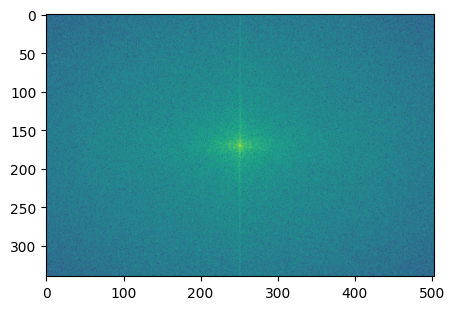

In [37]:
# the quadrants are needed to be shifted around in order that the low
#spatial frequencies are in the center of the 2D fourier-transformed image.
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(5,5))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))

#### FFT with numpy

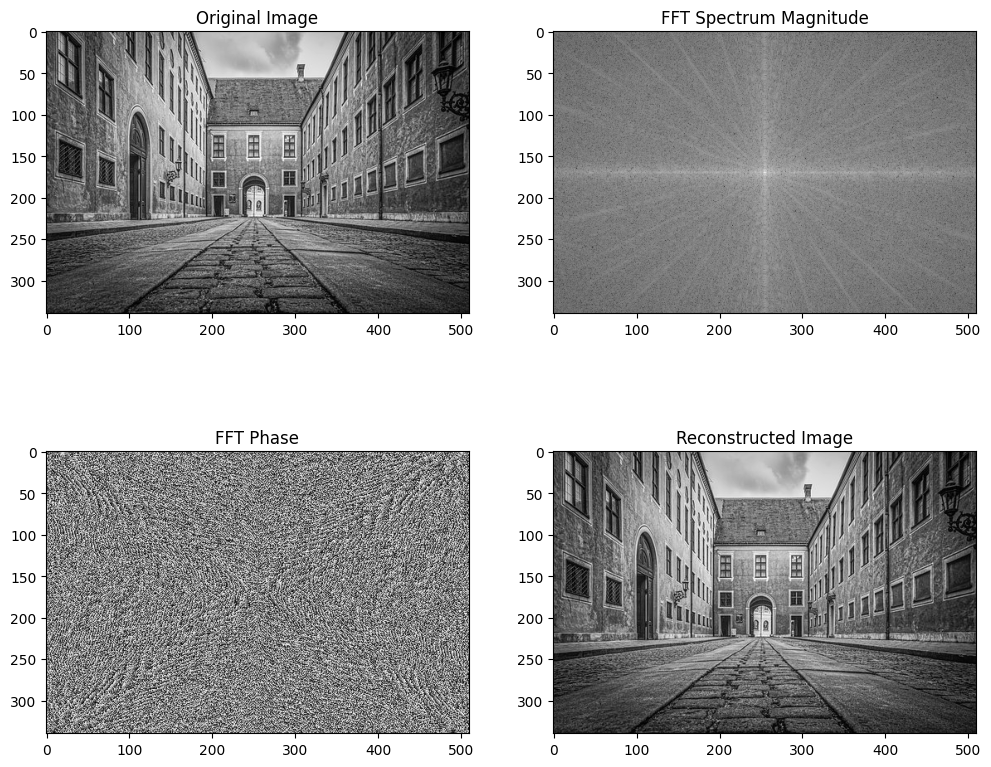

In [38]:
import numpy.fft as fp
im1 = np.array(Image.open('house.png').convert('L')) #converting to grayscale image

freq1 = fp.fft2(im1)              #tranforming using FFT
im2 = fp.ifft2(freq1).real        #reconstructing back to original

pylab.figure(figsize=(12,10))
pylab.subplot(2,2,1)
pylab.title('Original Image')
pylab.imshow(im1, cmap='gray')

pylab.subplot(2,2,2)
pylab.title('FFT Spectrum Magnitude')
pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')

pylab.subplot(2,2,3)
pylab.title('FFT Phase')
pylab.imshow(np.angle(fp.fftshift(freq1)), cmap='gray')

pylab.subplot(2,2,4)
pylab.title('Reconstructed Image')
pylab.imshow(np.clip(im2,0,255), cmap='gray')

## Convolution